<IPython.core.display.Javascript object>


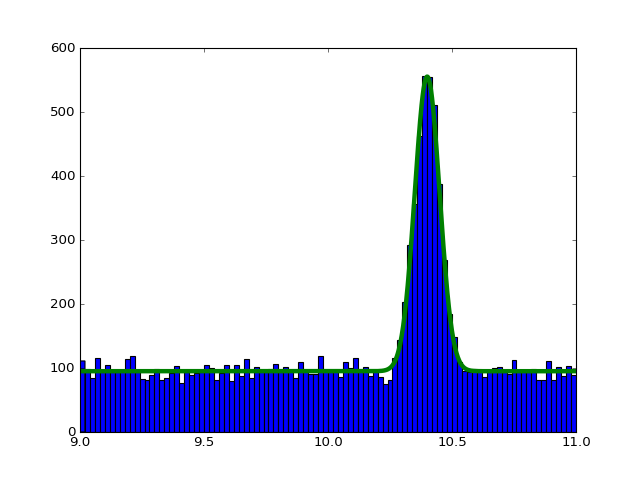

0.24
10.4
0.05
nsig: 3000.0   nbkg: 9500.0
0.52


In [1]:
import numpy as np
import matplotlib.pylab as plt
import math as math
%matplotlib  notebook

################################################################################
# This is how we define our own function
################################################################################
def Gaussian(x,mean,width):

    y = (1.0/(width*np.sqrt(2*np.pi)))*np.exp(-(x-mean)**2/(2*(width**2)))

    return y


################################################################################
# First thing I'm going to do is to generate some fake data for us to work with.
# 
# This is going to be more like a particle physics experiment. Suppose I'm looking
# at the mass calculated by combining two particles. Sometimes those two particles
# came from some random process (background), but sometimes they came from 
# some new particle we are hunting for (signal)!
#
# Let's generate these data!
################################################################################

# So here's your signal data!
Nsig = 3000
sig_mean = 10.4
sig_width = 0.05
signal = np.random.normal(sig_mean,sig_width,Nsig)

# So here's your background data!
Nbkg = 9500
background = 9.0+(2*np.random.random(Nbkg))

# Combine the background and signal, because when we run the experiment, we actually
# don't know which is which!
data = signal.copy()
data = np.append(data,background.copy())

# Here's a very simple plot of our data.
bins=100
plt.figure()
plt.hist(data,bins=bins)

#calc prob that event came from signal
probability_signal=[]
for num in signal:
    probability_signal.append(Gaussian(num,sig_mean,sig_width))
probability_background=.5
    
lower_mean=9.5
upper_mean=10.5
lower_width=0.01
upper_width=1
min_frac=0.01
max_frac=1
mean_step=.1
width_step=.01
frac_step=.01

best_mean=0
best_width=0
best_frac=0
 
max_probability=-999999999999999999
for i in np.arange(lower_mean,upper_mean,mean_step):
    for j in np.arange(lower_width,upper_width,width_step):
        for k in np.arange(min_frac,max_frac,frac_step):
            test_probability=0
            tot_prob=k*(Gaussian(data,i,j))+(1-k)*(probability_background)
            test_probability=np.log(tot_prob).sum()
            if test_probability > max_probability:
                max_probability=test_probability
                best_mean=i
                best_width=j
                best_frac=k

print best_frac
print best_mean
print best_width

ndata = len(data)
nsig = best_frac*ndata
nbkg = (1-best_frac)*ndata

print "nsig: %.1f   nbkg: %.1f" % (nsig,nbkg)

x = np.linspace(9.0,11.0,1000)
#y = Gaussian(x,best_mean,best_width)*nsig
y = (nbkg/bins)*np.ones(len(x))+(Gaussian(x,best_mean,best_width)*(nsig/(bins*(best_mean*best_width))))
#y = Gaussian(x,best_mean,best_width)*(nsig/(bins*(best_mean*best_width)))

print best_mean*best_width
plt.plot(x,y, linewidth=4)
plt.show()




In [76]:
1050/50


21